Import necessary libraries

In [ ]:
import requests
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

Input pre-processing

In [ ]:
img = Image.open(f"../sample/sample 1.png").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)



Get results from the deployed model

In [ ]:
API_KEY = "" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', 
                               data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist(), img2_arr.tolist(), img3_arr.tolist()]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/ae43e79c-1fbc-450a-b0b4-9a54c451033b/predictions?version=2022-11-10', 
                                 json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})

Display results

In [ ]:
plt.imshow(plt.imread("../sample/sample 1.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])

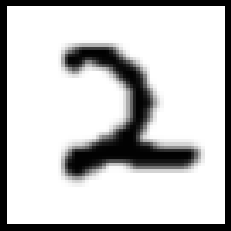

RESULT 2